# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, r2_score, mean_squared_error,roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv("C:/Users/rudra/Desktop/INT234/Public_Libraries.csv")

In [3]:
df.head()

,Fiscal Year,Library,County,AENGLC Rank,Population of Service Area,Total Library Visits,Library Visits Per Capita Served,Total Registered Borrowers,Percent of Residents with Library Cards,Reference Questions,...,Total Collection,Collection Per Capita Served,Total Operating Income,Operating Income Per Capita,Town Tax Appropriation for Library,Tax Appropriation Per Capita Served,Library Materials Expenditures,Wages & Salaries Expenditures,Operating Expenditures,Operating Expenditures Per Capita
0,1996,Andover,Tolland,109.0,2815.0,15000.0,5.3,1313.0,0.47,499.0,...,15285.0,5.4,56300.0,20.00,52915.0,18.80,10073.0,30996.0,44290.0,15.7
1,1996,Ansonia,New Haven,158.0,17825.0,91756.0,5.1,6952.0,0.39,NaN,...,63685.0,3.6,320679.0,17.99,323503.0,18.15,45874.0,201621.0,270658.0,15.2
2,1996,Ashford-Babcock,Windham,131.0,3969.0,8665.0,2.2,1360.0,0.34,207.0,...,23818.0,6.0,111699.0,28.14,106713.0,26.89,11508.0,62295.0,82769.0,20.9
3,1996,Avon,Hartford,19.0,14143.0,162893.0,11.5,8808.0,0.62,15283.0,...,74903.0,5.3,685678.0,48.48,602831.0,42.62,92711.0,340400.0,516583.0,36.5
4,1996,Beacon Falls,New Haven,129.0,5351.0,7000.0,1.3,1379.0,0.26,400.0,...,10042.0,1.9,40806.0,7.63,39256.0,7.34,4298.0,21585.0,39165.0,7.3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5278 entries, 0 to 5277
Data columns (total 27 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Fiscal Year                                         5278 non-null   int64  
 1   Library                                             5278 non-null   object 
 2   County                                              5278 non-null   object 
 3   AENGLC Rank                                         5161 non-null   float64
 4   Population of Service Area                          4814 non-null   float64
 5   Total Library Visits                                5059 non-null   float64
 6   Library Visits Per Capita Served                    5043 non-null   float64
 7   Total Registered Borrowers                          5173 non-null   float64
 8   Percent of Residents with Library Cards             5159 non-null   float64
 9

In [5]:
df.describe()

,Fiscal Year,AENGLC Rank,Population of Service Area,Total Library Visits,Library Visits Per Capita Served,Total Registered Borrowers,Percent of Residents with Library Cards,Reference Questions,Reference Questions Per Capita Served,Total Circulation,...,Total Collection,Collection Per Capita Served,Total Operating Income,Operating Income Per Capita,Town Tax Appropriation for Library,Tax Appropriation Per Capita Served,Library Materials Expenditures,Wages & Salaries Expenditures,Operating Expenditures,Operating Expenditures Per Capita
count,5278.000000,5161.000000,4814.000000,5059.000000,5043.000000,5173.000000,5159.000000,4874.000000,4845.000000,5.225000e+03,...,5201.000000,5150.000000,5.215000e+03,5171.000000,5.205000e+03,5160.000000,5.195000e+03,5.124000e+03,5.211000e+03,5180.000000
mean,2010.003410,84.506879,21247.535937,107157.471042,5.362425,9295.665765,0.476718,19744.192039,0.738092,1.502103e+05,...,82797.331504,5.421448,9.376033e+05,45.400722,8.093251e+05,34.949243,9.568891e+04,5.658243e+05,9.226869e+05,44.205837
std,8.346599,49.290179,25035.622607,139066.918784,3.914244,11518.957252,0.226061,39493.674615,0.856531,1.885630e+05,...,87323.107208,3.690736,1.447204e+06,36.727556,1.250240e+06,24.807234,1.444297e+05,8.288948e+05,1.405750e+06,35.253294
min,1996.000000,1.000000,632.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2003.000000,41.000000,5840.000000,17740.000000,2.600000,2470.000000,0.330000,1500.000000,0.200000,2.996500e+04,...,28654.000000,3.300000,1.756065e+05,25.540000,1.053540e+05,20.157500,1.765350e+04,1.048668e+05,1.699255e+05,24.000000
50%,2010.000000,84.000000,13095.000000,55000.000000,4.600000,5186.000000,0.460000,5771.500000,0.500000,7.880600e+04,...,56952.000000,4.700000,4.659760e+05,37.490000,3.751620e+05,32.060000,4.824600e+04,2.780260e+05,4.616200e+05,37.200000
75%,2017.000000,127.000000,25843.250000,132384.500000,7.200000,11474.000000,0.620000,19112.250000,0.900000,2.005130e+05,...,103307.000000,6.600000,1.054585e+06,54.465000,9.587710e+05,45.012500,1.075920e+05,6.591418e+05,1.039528e+06,54.325000
max,2024.000000,169.000000,148698.000000,989139.000000,25.700000,110832.000000,1.570000,573513.000000,8.100000,1.546762e+06,...,918170.000000,38.000000,1.702784e+07,439.970000,9.987656e+06,198.870000,1.339528e+06,7.351934e+06,1.343523e+07,418.020000


In [6]:
df.shape

(5278, 27)

In [7]:
df.isnull().sum()

Fiscal Year                                              0
Library                                                  0
County                                                   0
AENGLC Rank                                            117
Population of Service Area                             464
Total Library Visits                                   219
Library Visits Per Capita Served                       235
Total Registered Borrowers                             105
Percent of Residents with Library Cards                119
Reference Questions                                    404
Reference Questions Per Capita Served                  433
Total Circulation                                       53
Circulation Per Capita Served                           70
Total Programs (Synchronous + Prerecorded)             168
Total Program Attendance & Views                       191
Total Program Attendance & Views Per Capita Served     213
Use of Public Internet Computers                      19

# Data Preprocessing and Cleaning

In [9]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)

    df[col].fillna(df[col].mode()[0], inplace=True)

print("\nMissing values after handling:\n")
print(df.isnull().sum())

Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) |
          (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("\nShape after outlier removal:", df.shape)


Missing values after handling:

Fiscal Year                                           0
Library                                               0
County                                                0
AENGLC Rank                                           0
Population of Service Area                            0
Total Library Visits                                  0
Library Visits Per Capita Served                      0
Total Registered Borrowers                            0
Percent of Residents with Library Cards               0
Reference Questions                                   0
Reference Questions Per Capita Served                 0
Total Circulation                                     0
Circulation Per Capita Served                         0
Total Programs (Synchronous + Prerecorded)            0
Total Program Attendance & Views                      0
Total Program Attendance & Views Per Capita Served    0
Use of Public Internet Computers                      0
Total Collectio

C:\Users\rudra\AppData\Local\Temp\ipykernel_19484\4080889067.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\rudra\AppData\Local\Temp\ipykernel_19484\4080889067.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [10]:
num_df = df.select_dtypes(include=['int64', 'float64'])

In [11]:
corr = num_df.corr().abs().mean().sort_values(ascending=False)

In [12]:
target = corr.index[0]
print("Selected Target Column:", target)

Selected Target Column: Operating Expenditures


In [13]:
X = df.drop(columns=[target])
y = df[target]
y = pd.qcut(y, q=3, labels=["Low", "Medium", "High"])

In [14]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Train Test Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [17]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols)
    ]
)

In [18]:
X_train_final = preprocessor.fit_transform(X_train)
X_test_final = preprocessor.transform(X_test)

C:\Users\rudra\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [19]:
feature_names = (
    list(num_cols) +
    list(preprocessor.named_transformers_['cat']
         .get_feature_names_out(cat_cols))
)

In [20]:
X_train_final = pd.DataFrame(
    X_train_final.toarray(), columns=feature_names
)

In [21]:
X_test_final = pd.DataFrame(
    X_test_final.toarray(),
    columns=feature_names
)

# Logistic Regression

In [23]:
lr = LogisticRegression(max_iter=2000, C=1.5)
lr.fit(X_train_final,y_train)
lr_pred = lr.predict(X_test_final)

In [26]:
print("Accuracy Score in Logistic Regression",accuracy_score(y_test,lr_pred))
print("Confusion Matrix for Logistic Regression\n",confusion_matrix(y_test,lr_pred))

Accuracy Score in Logistic Regression 0.9656160458452722
Confusion Matrix for Logistic Regression
 [[221   0   5]
 [  0 249   6]
 [  8   5 204]]


# KNN

In [45]:
knn = KNeighborsClassifier(n_neighbors=7)

In [47]:
knn.fit(X_train_final, y_train)
knn_pred = knn.predict(X_test_final)

In [49]:
print("Accuracy Score in K-Nearest Neighbor",accuracy_score(y_test,knn_pred))
print("Confusion Matrix for K-Nearest Neighbor\n",confusion_matrix(y_test,knn_pred))

Accuracy Score in K-Nearest Neighbor 0.9398280802292264
Confusion Matrix for K-Nearest Neighbor
 [[214   0  12]
 [  0 243  12]
 [ 14   4 199]]


# Decision Tree

In [52]:
dt = DecisionTreeClassifier(criterion="gini",
    max_depth=10,
    random_state=42)
dt.fit(X_train_final,y_train)
dt_pred = dt.predict(X_test_final)

In [54]:
print("Accuracy Score in Decision Tree",accuracy_score(y_test,dt_pred))
print("Confusion Matrix for Decision Tree\n",confusion_matrix(y_test,dt_pred))

Accuracy Score in Decision Tree 0.9627507163323782
Confusion Matrix for Decision Tree
 [[218   0   8]
 [  0 251   4]
 [  6   8 203]]


# Random Forest

In [59]:
rf = RandomForestClassifier(n_estimators=300, max_depth=15, min_samples_split=10)
rf.fit(X_train_final, y_train)
rf_pred = rf.predict(X_test_final)

In [60]:
print("Accuracy Score in Random Forest",accuracy_score(y_test,rf_pred))
print("Confusion Matrix for Random Forest\n",confusion_matrix(y_test,rf_pred))

Accuracy Score in Random Forest 0.9684813753581661
Confusion Matrix for Random Forest
 [[217   0   9]
 [  0 251   4]
 [  6   3 208]]


# Accuracy Evaluation of Machine Learning Models

{'Logistic Regression': 0.9656160458452722, 'KNN': 0.9398280802292264, 'Decision Tree': 0.9627507163323782, 'Random Forest': 0.9684813753581661}


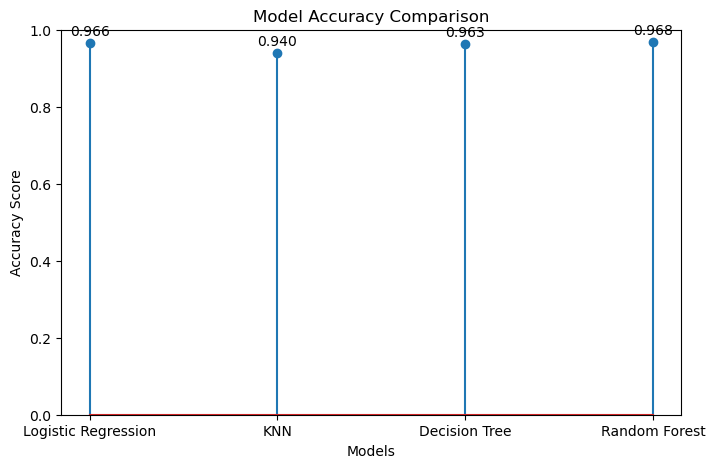

In [79]:
from sklearn.metrics import accuracy_score

accuracies = {
    "Logistic Regression": accuracy_score(y_test, lr_pred),
    "KNN": accuracy_score(y_test, knn_pred),
    "Decision Tree": accuracy_score(y_test, dt_pred),
    "Random Forest": accuracy_score(y_test, rf_pred)
}
print(accuracies)
import matplotlib.pyplot as plt
import numpy as np

models = list(accuracies.keys())
scores = list(accuracies.values())

x = np.arange(len(models))

plt.figure(figsize=(8,5))
plt.stem(x, scores)   # removed use_line_collection
plt.xticks(x, models)

plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Comparison")
plt.ylim(0,1)

for i, v in enumerate(scores):
    plt.text(i, v + 0.02, f"{v:.3f}", ha='center')

plt.show()


# Model Accuracy Comparison

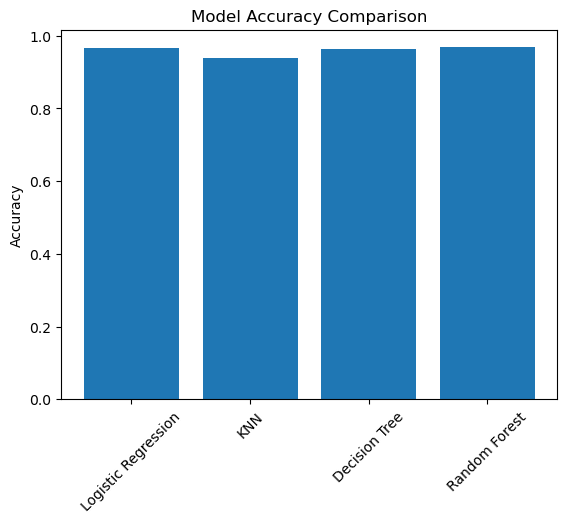

In [71]:
plt.figure()
plt.bar(list(accuracies.keys()), list(accuracies.values()))
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.show()

# Analysis of Top Contributing Features

In [ ]:
rf_importance = rf.feature_importances_
features = X_train_final.columns
indices = np.argsort(rf_importance)[::-1]
top_n = 15

plt.figure(figsize=(10, 6))

plt.bar(
    range(top_n),
    rf_importance[indices][:top_n]
)

plt.xticks(
    range(top_n),
    features[indices][:top_n],
    rotation=45,
    ha='right'
)

plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Top 15 Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()

# Feature Correlation Heatmap

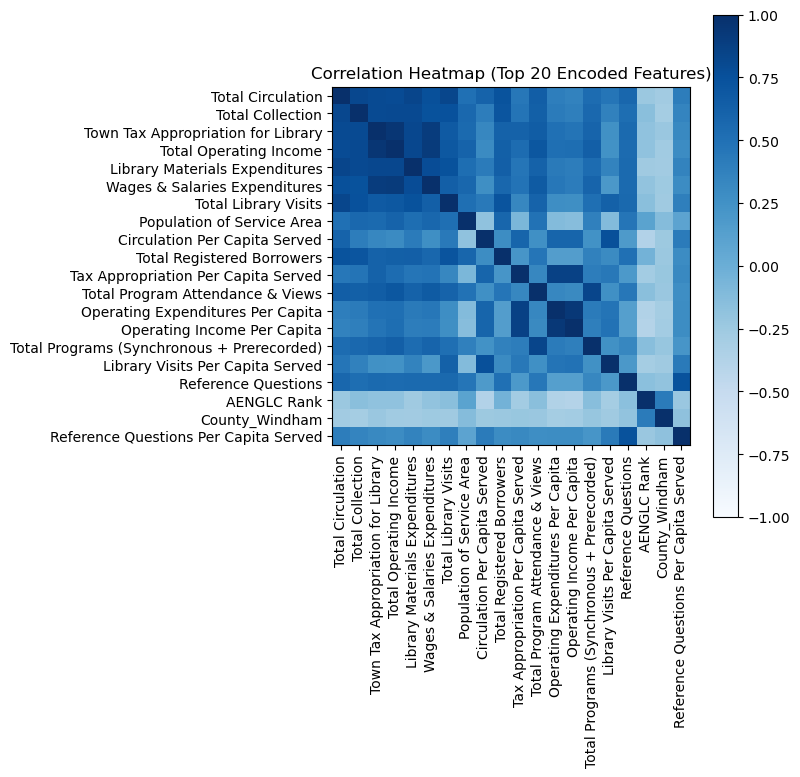

In [67]:
corr = X_train_final.corr()
top_n = 20
top_features = corr.abs().sum().sort_values(ascending=False).head(top_n).index
corr_top = corr.loc[top_features, top_features]

plt.figure(figsize=(8, 8))
plt.imshow(
    corr_top,
    cmap='Blues',
    vmin=-1,
    vmax=1
)

plt.xticks(range(len(corr_top.columns)), corr_top.columns, rotation=90)
plt.yticks(range(len(corr_top.columns)), corr_top.columns)
plt.title("Correlation Heatmap (Top 20 Encoded Features)")
plt.colorbar()
plt.tight_layout()
plt.show()
